In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font', family='NanumGothic')
SEED = 42

In [2]:
train_ft = pd.read_csv("train.csv")
test_ft = pd.read_csv("test.csv")

In [3]:
target = train_ft['대출등급']
len(target)

96294

In [4]:
train_ft=train_ft.iloc[:,1:-1]
test_ft=test_ft.iloc[:,1:]

In [5]:
train_ft['근로기간_copy']=train_ft['근로기간'].copy()
test_ft['근로기간_copy']=test_ft['근로기간'].copy()

In [6]:
train_ft.loc[train_ft['근로기간']=='3','근로기간']='3 years'
test_ft.loc[test_ft['근로기간']=='3','근로기간']='3 years'
test_ft.loc[test_ft['근로기간']=='1 year','근로기간']='1 years'
train_ft.loc[train_ft['근로기간']=='1 year','근로기간']='1 years'
test_ft.loc[test_ft['근로기간']=='<1 year','근로기간']='< 1 year'
train_ft.loc[train_ft['근로기간']=='<1 year','근로기간']='< 1 year'
test_ft.loc[test_ft['근로기간']=='10+years','근로기간']='10+ years'
train_ft.loc[train_ft['근로기간']=='10+years','근로기간']='10+ years'
test_ft.loc[test_ft['근로기간']=='Unknown','근로기간']='10+ years'
train_ft.loc[train_ft['근로기간']=='Unknown','근로기간']='10+ years'

In [7]:
values_map=dict({'6 years':6,
 '10+ years':10,
 '5 years':5,
 '8 years':8,
 '9 years':9,
 '2 years':2,
 '1 years':1,
 '3 years':3,
 '7 years':7,
 '4 years':4,
 '< 1 year':0,
 })

train_ft['근로기간']=train_ft['근로기간'].map(values_map)
test_ft['근로기간']=test_ft['근로기간'].map(values_map)

In [8]:
train_ft['근로기간_copy'] = train_ft['근로기간_copy'].replace({
    '<1 year': 'u_1_year',
    '< 1 year': 'u_1_year',
    '1 years': '1_year',
    '1 year' : '1_year',
    '2 years' : '2_years',
    '3': '3_years',
    '3 years' : '3_years',
    '4 years' : '4_years',
    '5 years' : '5_years',
    '6 years' : '6_years',
    '7 years' : '7_years',
    '8 years' : '8_years',
    '9 years' : '9_years',
    '10+years': '10p_years',
    '10+ years' : '10p_years'

})

test_ft['근로기간_copy'] = test_ft['근로기간_copy'].replace({
    '<1 year': 'u_1_year',
    '< 1 year': 'u_1_year',
    '1 years': '1_year',
    '1 year' : '1_year',
    '2 years' : '2_years',
    '3': '3_years',
    '3 years' : '3_years',
    '4 years' : '4_years',
    '5 years' : '5_years',
    '6 years' : '6_years',
    '7 years' : '7_years',
    '8 years' : '8_years',
    '9 years' : '9_years',
    '10+years': '10p_years',
    '10+ years' : '10p_years'

})


In [9]:
근로기간_dict = {
    "Unknown": 1,
    "u_1_year": 1.5,
    "1_year": 2,
    "2_years": 3,
    "3_years": 4,
    "4_years": 5,
    "5_years": 6,
    "6_years": 7,
    "7_years": 8,
    "8_years": 9,
    "9_years": 10,
    "10p_years": 11
}

# '근로기간' 열을 숫자로 변환하여 새로운 열 '근로기간 숫자'를 생성
train_ft['근로기간_숫자'] = train_ft['근로기간_copy'].map(근로기간_dict)
test_ft['근로기간_숫자'] = test_ft['근로기간_copy'].map(근로기간_dict)

In [10]:
train_ft

,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,근로기간_copy,근로기간_숫자
0,12480000,36 months,6,RENT,72000000,18.90,15,부채 통합,0,0,0.0,0.0,0.0,6_years,7.0
1,14400000,60 months,10,MORTGAGE,130800000,22.33,21,주택 개선,0,373572,234060.0,0.0,0.0,10p_years,11.0
2,12000000,36 months,5,MORTGAGE,96000000,8.60,14,부채 통합,0,928644,151944.0,0.0,0.0,5_years,6.0
3,14400000,36 months,8,MORTGAGE,132000000,15.09,15,부채 통합,0,325824,153108.0,0.0,0.0,8_years,9.0
4,18000000,60 months,10,RENT,71736000,25.39,19,주요 구매,0,228540,148956.0,0.0,0.0,Unknown,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96289,14400000,36 months,10,MORTGAGE,210000000,9.33,33,신용 카드,0,974580,492168.0,0.0,0.0,10p_years,11.0
96290,28800000,60 months,10,MORTGAGE,132000000,5.16,25,주택 개선,0,583728,855084.0,0.0,0.0,10p_years,11.0
96291,14400000,36 months,1,MORTGAGE,84000000,11.24,22,신용 카드,0,1489128,241236.0,0.0,0.0,1_year,2.0
96292,15600000,36 months,5,MORTGAGE,66330000,17.30,21,부채 통합,2,1378368,818076.0,0.0,0.0,5_years,6.0


In [11]:
# any는 무엇인가?
# any의 값은 하나밖에 존재하지 않기 때문에 대표값을 넣어준다.
# 가장 빈도수가 높은 부분에 any를 넣어준다.

train_ft['주택소유상태'] = train_ft['주택소유상태'].replace('ANY','MORTGAGE')
train_ft['주택소유상태'].value_counts()

주택소유상태
MORTGAGE    47935
RENT        37705
OWN         10654
Name: count, dtype: int64

In [12]:
train_ft['대출기간_숫자'] = train_ft['대출기간'].str.strip().replace('months', '', regex=True).astype(float)
test_ft['대출기간_숫자'] = test_ft['대출기간'].str.strip().replace('months', '', regex=True).astype(float)


## 상환원금 관련 피처

In [13]:
train_ft['대출금액_대비_총상환원금'] = train_ft['총상환원금'] / train_ft['대출금액']
test_ft['대출금액_대비_총상환원금'] = test_ft['총상환원금'] / test_ft['대출금액']

In [14]:
# 총상환이자 / 대출금액

train_ft['대출금액_대비_총상환이자'] = train_ft['총상환이자'] / train_ft['대출금액']
test_ft['대출금액_대비_총상환이자'] = test_ft['총상환이자'] / test_ft['대출금액']

In [15]:
train_ft['총상환원금_대비_대출금액비율'] = train_ft['총상환원금']/train_ft['대출금액']
test_ft['총상환원금_대비_대출금액비율'] = test_ft['총상환원금']/test_ft['대출금액']

In [16]:
train_ft['대출금액_대비_총상환이자_비율'] = train_ft['총상환이자']/train_ft['대출금액']
test_ft['대출금액_대비_총상환이자_비율'] = test_ft['총상환이자']/test_ft['대출금액']

In [17]:
train_ft['대출기간_대비_연체금액']  = train_ft['총연체금액'] / train_ft['대출기간_숫자'] 
test_ft['대출기간_대비_연체금액']  = test_ft['총연체금액'] / test_ft['대출기간_숫자'] 

In [18]:
train_ft['대출_대비_소득_비율'] = train_ft['연간소득'] / train_ft['대출금액']
test_ft['대출_대비_소득_비율'] = test_ft['연간소득'] / test_ft['대출금액']

In [19]:
train_ft['대출금액_대비_총상환원금'] = train_ft['총상환원금'] / train_ft['대출금액']
test_ft['대출금액_대비_총상환원금'] = test_ft['총상환원금'] / test_ft['대출금액']

train_ft['대출금액_대비_총상환이자'] = train_ft['총상환이자'] / train_ft['대출금액']
test_ft['대출금액_대비_총상환이자'] = test_ft['총상환이자'] / test_ft['대출금액']

In [20]:
train_ft['연체계좌수_총상환원금_대비_총이자'] = train_ft['총상환이자'] / train_ft['총상환원금']
test_ft['연체계좌수_총상환원금_대비_총이자'] = test_ft['총상환이자'] / test_ft['총상환원금']

In [21]:
train_ft['상환_대비_이자_비율'] = train_ft.apply(lambda x: x['총상환이자'] / x['총상환원금'] if x['총상환원금'] > 0 else float('nan'), axis=1)

In [22]:
test_ft['상환_대비_이자_비율'] = test_ft.apply(lambda x: x['총상환이자'] / x['총상환원금'] if x['총상환원금'] > 0 else float('nan'), axis=1)

In [23]:
train_ft['부채금액_2'] = train_ft['대출금액'] - train_ft['총상환원금']
test_ft['부채금액_2'] = test_ft['대출금액'] - test_ft['총상환원금']

In [24]:
train_ft['부채금액_대비_대출금액_2'] = train_ft['대출금액'] / train_ft['부채금액_2']
test_ft['부채금액_대비_대출금액_2'] = test_ft['대출금액'] / test_ft['부채금액_2']

In [25]:
train_ft['총상환이자_대비_총상환원금'] = train_ft['총상환원금'] / train_ft['총상환이자']
test_ft['총상환이자_대비_총상환원금'] = test_ft['총상환원금'] / test_ft['총상환이자']

In [26]:
train_ft['상환원금대비상환이자_비율'] = train_ft['총상환원금'] / (train_ft['총상환이자'] + 1)  # 총상환이자가 0인 경우를 방지하기 위해 1을 더함
test_ft['상환원금대비상환이자_비율'] = test_ft['총상환원금'] / (test_ft['총상환이자'] + 1)

In [27]:
train_ft['총상환률'] = (train_ft['총상환원금'] + train_ft['총상환이자']) / train_ft['대출금액']
test_ft['총상환률'] = (test_ft['총상환원금'] + test_ft['총상환이자']) / test_ft['대출금액']


In [28]:
train_ft['상환금액대비부채_비율'] = (train_ft['총상환원금'] + train_ft['총상환이자']) / (train_ft['부채금액_2'] + 1)  # 부채금액이 0인 경우를 방지하기 위해 1을 더함
test_ft['상환금액대비부채_비율'] = (test_ft['총상환원금'] + test_ft['총상환이자']) / (test_ft['부채금액_2'] + 1)

In [31]:
train_ft['대출기간대비월상환금'] = train_ft['월별상환금'] / (train_ft['대출기간_숫자'] + 1)  # 대출기간이 0인 경우를 방지하기 위해 1을 더함
test_ft['대출기간대비월상환금'] = test_ft['월별상환금'] / (test_ft['대출기간_숫자'] + 1)


In [32]:
train_ft['대출관련금액_대비_연간소득'] = train_ft['연간소득'] / (train_ft['대출금액'] + train_ft['총상환원금'])
test_ft['대출관련금액_대비_연간소득'] = test_ft['연간소득'] / (test_ft['대출금액'] + test_ft['총상환원금'])

In [33]:
train_ft['총상환원금_대비_총계좌수'] = train_ft['총계좌수'] / train_ft['총상환원금']
test_ft['총상환원금_대비_총계좌수'] = test_ft['총계좌수'] / test_ft['총상환원금']

In [34]:
train_ft['대출금액_대비_총상환원금 / 총계좌수'] = train_ft['대출금액_대비_총상환원금'] / train_ft['총계좌수']
test_ft['대출금액_대비_총상환원금 / 총계좌수'] = test_ft['대출금액_대비_총상환원금'] / test_ft['총계좌수']

## 수학 공식 피처

In [35]:
def calculate_altman_z_score(row):
    # 각 피처의 비율 계산
    working_capital_ratio = row['근로기간'] / row['대출금액']
    retained_earnings_ratio = row['총상환원금'] / row['대출금액']
    total_accounts_ratio = row['총계좌수'] / row['대출금액']
    delinquent_accounts_ratio = row['연체계좌수'] / row['대출금액']
    total_delinquency_ratio = row['총연체금액'] / row['대출금액']

    # Altman Z-Score 계산
    altman_z_score = 1.2 * working_capital_ratio + 1.4 * retained_earnings_ratio + 3.3 * total_accounts_ratio + 0.6 * delinquent_accounts_ratio + 1.0 * total_delinquency_ratio

    return altman_z_score


train_ft['Altman_Z_Score'] = train_ft.apply(calculate_altman_z_score, axis=1)
test_ft['Altman_Z_Score'] = test_ft.apply(calculate_altman_z_score, axis=1)

In [30]:
#대출금액과 대출기간을 활용하여 월별 상환금 계산
train_ft['월별상환금'] = train_ft['대출금액'] / train_ft['대출기간_숫자']

# 근사적인 DTI 계산
train_ft['DTI'] = (train_ft['월별상환금'] * 12) / (train_ft['연간소득'] * (train_ft['부채_대비_소득_비율'] / 100))

# 근사적인 DTI 계산
test_ft['월별상환금'] = test_ft['대출금액'] / test_ft['대출기간_숫자']

# 근사적인 DTI 계산
test_ft['DTI'] = (test_ft['월별상환금'] * 12) / (test_ft['연간소득'] * (test_ft['부채_대비_소득_비율'] / 100))

train_ft['DTI'] = train_ft['DTI'].replace(np.inf,0)
test_ft['DTI'] = test_ft['DTI'].replace(np.inf,0)

In [36]:
# 재정 건강 점수
# 소득이 높고 부채 비율이 낮으며 금융 계정의 다양성이 높은 차용자에게 더 높은 점수르 제공하여 잠재적으로 더 나은 재무 건정성을 나타냅니다.

train_ft['재정_건강_점수'] = (train_ft['연간소득'] * (1 - train_ft['DTI']) * train_ft['총계좌수']) / 1000
test_ft['재정_건강_점수'] = (test_ft['연간소득'] * (1 - test_ft['DTI']) * test_ft['총계좌수']) / 1000

In [37]:
train_ft['금융_다양성_지수'] = (train_ft['총계좌수'] * train_ft['연간소득']) / (1+train_ft['DTI'])
test_ft['금융_다양성_지수'] = (test_ft['총계좌수'] * test_ft['연간소득']) / (1+test_ft['DTI'])

In [38]:
# 재무 안정성 점수
# 재무 안정성 점수가 높을수록 소득과 차용인의 원금 상환 내역을 모두 고려하여 보다 안정적인 재무 상태를 시사

train_ft['재무_안정성_점수'] = (train_ft['연간소득'] + train_ft['총상환원금'])/(train_ft['총계좌수']+1)
test_ft['재무_안정성_점수'] = (test_ft['연간소득'] + test_ft['총상환원금'])/(test_ft['총계좌수']+1)

In [39]:
# 재정_건강_점수
# 소득이 높고 부채 비율이 낮으며 금융 계정의 다양성이 높은 차용자에게 더 높은 점수르 제공하여 잠재적으로 더 나은 재무 건정성을 나타냅니다.

train_ft['재정_건강_점수'] = (train_ft['연간소득'] * (1 - train_ft['DTI']) * train_ft['총계좌수']) / 1000
test_ft['재정_건강_점수'] = (test_ft['연간소득'] * (1 - test_ft['DTI']) * test_ft['총계좌수']) / 1000

## 연간소득 관련

In [40]:
train_ft['부채금액_1'] = train_ft['연간소득'] / (train_ft['부채_대비_소득_비율'] / 100)
test_ft['부채금액_1'] = test_ft['연간소득'] / (test_ft['부채_대비_소득_비율'] / 100)

dept_max = train_ft['부채금액_1'].replace(np.inf,np.nan).max()
train_ft['부채금액_1'] = train_ft['부채금액_1'].replace(np.inf,dept_max)

dept_max = test_ft['부채금액_1'].replace(np.inf,np.nan).max()
test_ft['부채금액_1'] = test_ft['부채금액_1'].replace(np.inf,dept_max)


In [41]:
train_ft['연간소득_대비_대출금액'] = train_ft['대출금액'] / train_ft['연간소득']
test_ft['연간소득_대비_대출금액'] = test_ft['대출금액'] / train_ft['연간소득']

In [42]:
train_ft['연간소득_대비_총계좌수'] = train_ft['총계좌수'] / train_ft['연간소득']
test_ft['연간소득_대비_총계좌수'] = test_ft['총계좌수'] / test_ft['연간소득']

In [43]:
train_ft['연간소득_대비_연체횟수'] = train_ft['최근_2년간_연체_횟수'] / train_ft['연간소득']
test_ft['연간소득_대비_연체횟수'] = test_ft['최근_2년간_연체_횟수'] / test_ft['연간소득']

In [44]:
train_ft['연간소득_대비_총상환이자'] = train_ft['총상환이자'] / train_ft['연간소득']
test_ft['연간소득_대비_총상환이자'] = test_ft['총상환이자'] / test_ft['연간소득']

temp_max = train_ft['연간소득_대비_총상환이자'].replace(np.inf,np.nan).max()
train_ft['연간소득_대비_총상환이자'] = train_ft['연간소득_대비_총상환이자'].replace(np.inf,temp_max)
test_ft['연간소득_대비_총상환이자'] = test_ft['연간소득_대비_총상환이자'].replace(np.inf,temp_max)

## 분위수 특성

In [45]:
# 대출금액 분위수 설정
q1,q3 = train_ft['대출금액'].quantile([0.25,0.75])
iqr = q3 - q1
w = 1.5
box_min = q1 - iqr * w
box_max = q1 + iqr * w

def boxplot(x):
    if x < box_min or x >= box_max:
        return 0 # x가 이상치의 경우에는 0으로 설정해준다.
    elif box_min <= x < q1:
        return 1  # x가 Q1보다 크거나 같고 Q1보다 작은 경우
    elif q1 <= x < q3:
        return 2  # x가 Q1 이상이고 Q3 미만인 경우
    elif q3 <= x < box_max:
        return 3  # x가 Q3 이상이고 box_max 미만인 경우
    else:
        return 'Undefined'

train_ft['대출금액_분위수'] = train_ft['대출금액'].apply(boxplot)
test_ft['대출금액_분위수'] = test_ft['대출금액'].apply(boxplot)

In [46]:
tmp= train_ft[train_ft['연체계좌수'] == 1].copy()

# 대출금액을 새로운 피처로 만들기
tmp['대출금액_연체1'] = tmp['대출금액']
# 새로운 피처를 기존 데이터프레임에 병합
train_ft = pd.merge(train_ft, tmp[['대출금액_연체1']], how='left', left_index=True, right_index=True)

train_ft['대출금액_연체1'].fillna(0, inplace=True)


In [47]:
tmp= test_ft[test_ft['연체계좌수'] == 1].copy()

# 대출금액을 새로운 피처로 만들기
tmp['대출금액_연체1'] = tmp['대출금액']
# 새로운 피처를 기존 데이터프레임에 병합
test_ft = pd.merge(test_ft, tmp[['대출금액_연체1']], how='left', left_index=True, right_index=True)

test_ft['대출금액_연체1'].fillna(0, inplace=True)

## 도훈 30

In [48]:
train_ft['월별이자부담'] = train_ft['상환_대비_이자_비율']/train_ft['대출기간_숫자']
train_ft['월별이자부담'].fillna(0,inplace = True)
test_ft['월별이자부담'] = test_ft['상환_대비_이자_비율']/test_ft['대출기간_숫자']
test_ft['월별이자부담'].fillna(0,inplace = True)

In [49]:
train_ft['대출기간_숫자'] = train_ft['대출기간'].str.extract('(\d+)').astype(int)
test_ft['대출기간_숫자'] = test_ft['대출기간'].str.extract('(\d+)').astype(int)

In [50]:
train_ft['상환_대비_이자_비율'] = train_ft.apply(lambda x: x['총상환이자'] / x['총상환원금'] if x['총상환원금'] > 0 else float('nan'), axis=1)
max_상환_대비_이자_비율 = train_ft['상환_대비_이자_비율'].max()
train_ft['상환_대비_이자_비율'].fillna(max_상환_대비_이자_비율, inplace=True)

test_ft['상환_대비_이자_비율'] = test_ft.apply(lambda x: x['총상환이자'] / x['총상환원금'] if x['총상환원금'] > 0 else float('nan'), axis=1)
max_상환_대비_이자_비율 = test_ft['상환_대비_이자_비율'].max()
test_ft['상환_대비_이자_비율'].fillna(max_상환_대비_이자_비율, inplace=True)

In [51]:
train_ft['총상환원금_대비_대출금액비율'] = train_ft['총상환원금']/train_ft['대출금액']
test_ft['총상환원금_대비_대출금액비율'] = test_ft['총상환원금']/test_ft['대출금액']

In [52]:
train_ft['총상환이자_대비_대출금액비율'] = train_ft['총상환이자']/train_ft['대출금액']
test_ft['총상환이자_대비_대출금액비율'] = test_ft['총상환이자']/test_ft['대출금액']

In [53]:
train_ft['대출기간_대비_연체금액']  = train_ft['총연체금액'] / train_ft['대출기간_숫자'] 
test_ft['대출기간_대비_연체금액']  = test_ft['총연체금액'] / test_ft['대출기간_숫자'] 

In [54]:
train_ft['대출_대비_소득_비율'] = train_ft['연간소득'] / train_ft['대출금액']
test_ft['대출_대비_소득_비율'] = test_ft['연간소득'] / test_ft['대출금액']

In [55]:
mask = (train_ft == np.inf).sum(0) > 0
train_ft.columns[mask].to_list()

['연체계좌수_총상환원금_대비_총이자',
 '부채금액_대비_대출금액_2',
 '총상환이자_대비_총상환원금',
 '총상환원금_대비_총계좌수',
 '연간소득_대비_대출금액',
 '연간소득_대비_총계좌수',
 '연간소득_대비_연체횟수']

In [56]:
train_ft[train_ft.columns[mask].to_list()]=train_ft[train_ft.columns[mask].to_list()].replace([np.inf, -np.inf], np.nan)
test_ft[test_ft.columns[mask].to_list()]=test_ft[test_ft.columns[mask].to_list()].replace([np.inf, -np.inf], np.nan)

In [57]:
train_ft[train_ft.columns[mask].to_list()] = train_ft[train_ft.columns[mask].to_list()].fillna(train_ft[train_ft.columns[mask].to_list()].max()).copy()
test_ft[test_ft.columns[mask].to_list()] = test_ft[test_ft.columns[mask].to_list()].fillna(train_ft[test_ft.columns[mask].to_list()].max()).copy()

In [58]:
train_ft.fillna(0,inplace=True),test_ft.fillna(0,inplace=True)
train_ft.isnull().sum().sum(),test_ft.isnull().sum().sum()

(0, 0)

In [59]:
train_ft.select_dtypes('object')

,대출기간,주택소유상태,대출목적,근로기간_copy
0,36 months,RENT,부채 통합,6_years
1,60 months,MORTGAGE,주택 개선,10p_years
2,36 months,MORTGAGE,부채 통합,5_years
3,36 months,MORTGAGE,부채 통합,8_years
4,60 months,RENT,주요 구매,Unknown
...,...,...,...,...
96289,36 months,MORTGAGE,신용 카드,10p_years
96290,60 months,MORTGAGE,주택 개선,10p_years
96291,36 months,MORTGAGE,신용 카드,1_year
96292,36 months,MORTGAGE,부채 통합,5_years


In [60]:
from sklearn.preprocessing import OneHotEncoder
cols = ['대출기간','주택소유상태','대출목적','근로기간_copy']
enc = OneHotEncoder(handle_unknown = 'ignore')


In [61]:
tmp = pd.DataFrame(
    enc.fit_transform(train_ft[cols]).toarray(),
    columns = enc.get_feature_names_out()
)

train_ft = pd.concat([train_ft,tmp],axis=1).drop(columns=cols)

In [62]:
tmp = pd.DataFrame(
    enc.transform(test_ft[cols]).toarray(),
    columns = enc.get_feature_names_out()
)

test_ft = pd.concat([test_ft,tmp],axis=1).drop(columns=cols)


In [63]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_row', None)


In [ ]:
    working_capital_ratio = row['근로기간'] / row['대출금액']
    retained_earnings_ratio = row['총상환원금'] / row['대출금액']
    total_accounts_ratio = row['총계좌수'] / row['대출금액']
    delinquent_accounts_ratio = row['연체계좌수'] / row['대출금액']
    total_delinquency_ratio = row['총연체금액'] / row['대출금액']

In [ ]:
train

In [63]:
train_ft['대출등급']=target

In [64]:
train_ft.pivot_table(index=['대출등급'],values=['총상환원금_대비_대출금액비율','Altman_Z_Score','월별이자부담'],aggfunc='mean')

,Altman_Z_Score,월별이자부담,총상환원금_대비_대출금액비율
대출등급,,,
A,0.084184,0.005590,0.060125
B,0.072057,0.008673,0.051463
C,0.063430,0.012512,0.045299
D,0.057101,0.017477,0.040775
E,0.047862,0.022209,0.034178
F,0.041180,0.031114,0.029405
G,0.036104,0.039741,0.025777


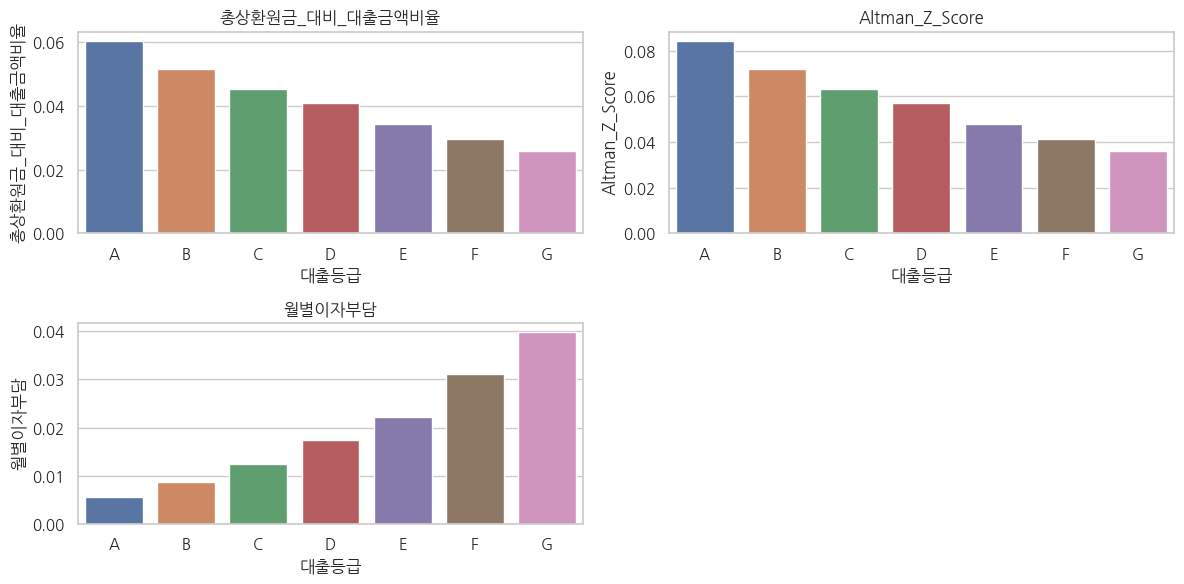

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

# pivot_table 결과 저장
pivot_table_result = train_ft.pivot_table(index=['대출등급'],
                                          values=['총상환원금_대비_대출금액비율', 'Altman_Z_Score', '월별이자부담'],
                                          aggfunc='mean')

# 시각화
plt.figure(figsize=(12, 6))

# 총상환원금_대비_대출금액비율 그래프
plt.subplot(2, 2, 1)
sns.barplot(x=pivot_table_result.index, y='총상환원금_대비_대출금액비율', data=pivot_table_result)
plt.title('총상환원금_대비_대출금액비율')

# Altman_Z_Score 그래프
plt.subplot(2, 2, 2)
sns.barplot(x=pivot_table_result.index, y='Altman_Z_Score', data=pivot_table_result)
plt.title('Altman_Z_Score')

# 월별이자부담 그래프
plt.subplot(2, 2, 3)
sns.barplot(x=pivot_table_result.index, y='월별이자부담', data=pivot_table_result)
plt.title('월별이자부담')

plt.tight_layout()
plt.show()


In [107]:
train_ft.pivot_table(index=['대출등급','근로기간'],values=[ 'Altman_Z_Score','대출금액_대비_총상환원금','총상환원금_대비_대출금액비율'],aggfunc='mean')

Altman_Z_Score  대출금액_대비_총상환원금  총상환원금_대비_대출금액비율
대출등급 근로기간                                                
A    0           0.083227       0.059443         0.059443
     1           0.086274       0.061619         0.061619
     2           0.084215       0.060147         0.060147
     3           0.086294       0.061634         0.061634
     4           0.085032       0.060731         0.060731
     5           0.086727       0.061943         0.061943
     6           0.084243       0.060168         0.060168
     7           0.092084       0.065769         0.065769
     8           0.083113       0.059361         0.059361
     9           0.080194       0.057276         0.057276
     10          0.082950       0.059243         0.059243
B    0           0.073490       0.052487         0.052487
     1           0.074074       0.052904         0.052904
     2           0.072416       0.051719         0.051719
     3           0.072946       0.052097         0.052097
     4           0.071781       0.051265         0.051265
     5           0.073197       0.052274         0.052274
     6           0.075212       0.053714         0.053714
     7           0.072710       0.051930         0.051930
     8           0.070528       0.050372         0.050372
     9           0.075110       0.053642         0.053642
     10          0.070573       0.050402         0.050402
C    0           0.065373       0.046687         0.046687
     1           0.066127       0.047225         0.047225
     2           0.064908       0.046353         0.046353
     3           0.065046       0.046452         0.046452
     4           0.064614       0.046147         0.046147
     5           0.063513       0.045359         0.045359
     6           0.063719       0.045504         0.045504
     7           0.069088       0.049343         0.049343
     8           0.061006       0.043570         0.043570
     9           0.060259       0.043031         0.043031
     10          0.061661       0.044035         0.044035
D    0           0.056818       0.040572         0.040572
     1           0.059189       0.042271         0.042271
     2           0.055752       0.039812         0.039812
     3           0.057501       0.041060         0.041060
     4           0.060337       0.043088         0.043088
     5           0.055382       0.039548         0.039548
     6           0.058167       0.041541         0.041541
     7           0.063173       0.045114         0.045114
     8           0.057837       0.041304         0.041304
     9           0.059630       0.042584         0.042584
     10          0.055664       0.039745         0.039745
E    0           0.051833       0.037015         0.037015
     1           0.052074       0.037189         0.037189
     2           0.048280       0.034477         0.034477
     3           0.050893       0.036347         0.036347
     4           0.050142       0.035799         0.035799
     5           0.051586       0.036844         0.036844
     6           0.044158       0.031533         0.031533
     7           0.047090       0.033630         0.033630
     8           0.044706       0.031929         0.031929
     9           0.042111       0.030069         0.030069
     10          0.045897       0.032771         0.032771
F    0           0.035919       0.025653         0.025653
     1           0.038685       0.027629         0.027629
     2           0.036120       0.025797         0.025797
     3           0.037303       0.026625         0.026625
     4           0.043364       0.030972         0.030972
     5           0.035164       0.025114         0.025114
     6           0.043967       0.031402         0.031402
     7           0.053667       0.038303         0.038303
     8           0.045055       0.032178         0.032178
     9           0.046933       0.033520         0.033520
     10          0.042289       0.030192         0.030192
G    0           0.029183       0.020842         0.020842
     1   

In [85]:
pd.read_csv("DH_sub_00_union.csv")['대출등급']

0        B
1        B
2        A
3        C
4        C
        ..
64192    D
64193    D
64194    D
64195    C
64196    A
Name: 대출등급, Length: 64197, dtype: object

In [282]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

train_scaled = scaler.fit_transform(train_ft)
test_scaled = scaler.transform(test_ft)

train_data = pd.DataFrame(train_scaled, columns = train_ft.columns)
test_data = pd.DataFrame(test_scaled, columns = test_ft.columns)

train_data.shape,test_data.shape

((96294, 74), (64197, 74))

In [283]:
# 정답 데이터
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
target = le.fit_transform(target)
target

array([2, 1, 0, ..., 0, 3, 2])

In [284]:
SEED=42
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=10,shuffle=True, random_state=SEED)

In [285]:
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel,SelectKBest,f_classif
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE

In [286]:
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

# LGBMClassifier
lgbm_model = LGBMClassifier(random_state=SEED, objective='multiclass', num_class=len(set(target)))

# CatBoostClassifier
cat_model = CatBoostClassifier(random_state=SEED, loss_function='MultiClass', classes_count=len(set(target)))

# XGBClassifier
xgb_model = XGBClassifier(random_state=SEED, objective='multi:softmax', num_class=len(set(target)))

# RandomForestClassifier
rf_model = RandomForestClassifier(random_state=SEED, n_estimators=100, criterion='gini', class_weight='balanced')


In [296]:
SEED =622

In [297]:
Best_Parameters={'n_estimators': 155, 'max_depth': 10, 'learning_rate': 0.03891426367263122, 'subsample': 0.9104345919006934, 'colsample_bytree': 0.7717453674190411, 'min_child_weight': 1}

In [298]:
xgb_model=XGBClassifier(**Best_Parameters,random_state=SEED, objective="multi:softmax")

In [289]:
scores = cross_val_score(xgb_model, train_data, target, cv=cv, scoring='f1_macro', n_jobs=-1)
mean_f1_macro = np.mean(scores)
mean_f1_macro

0.9288596124329915

In [299]:
LightGBM_Best_Parameters= {'n_estimators': 196, 'max_depth': 10, 'learning_rate': 0.022989933199300393, 'subsample': 0.9549318074007551, 'colsample_bytree': 0.733631469760139, 'min_child_weight': 2}

In [300]:
lgbm_model = LGBMClassifier(**LightGBM_Best_Parameters,random_state=SEED, objective='multiclass', num_class=len(set(target)))

In [301]:
from sklearn.ensemble import VotingClassifier

estimators = [
    ("lgbm", lgbm_model ),
    ("xgb", xgb_model ),
]
Vot_model = VotingClassifier(estimators, voting="soft", n_jobs=-1,verbose=0)

scores = cross_val_score(Vot_model, train_data, target, cv=cv, scoring="f1_macro", n_jobs=-1)
scores.mean()

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, repl

0.9282301199330927

In [304]:
sample_sub = pd.read_csv("sample_submission.csv")

In [305]:
Vot_model.fit(train_data,target)

pred = Vot_model.predict(test_data)
pred

sample_sub["대출등급"] = le.inverse_transform(pred)
sample_sub
sample_sub.to_csv("DH_sub_00_union.csv",index=False)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.050477 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9281
[LightGBM] [Info] Number of data points in the train set: 96294, number of used features: 74
[LightGBM] [Info] Start training from score -1.747695
[LightGBM] [Info] Start training from score -1.206441
[LightGBM] [Info] Start training from score -1.248757
[LightGBM] [Info] Start training from score -1.975590
[LightGBM] [Info] Start training from score -2.572162
[LightGBM] [Info] Start training from score -3.897527
[LightGBM] [Info] Start training from score -5.